#### Importing the necessary data from the train set using pandas 

In [762]:
import pandas as pd
import numpy as np
import random as rnd
import graphviz
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz,DecisionTreeRegressor


In [763]:
train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')
combine = [train_df, test_df]

In [764]:
#train_df['Ticket']

In [765]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]



In [766]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [767]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Dr', 'Rev', 'Sir', 'Jonkheer', 'Dona','Col','Major','Capt'], 'Other')
    #dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Dr', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')    
    #dataset['Title'] = dataset['Title'].replace(['Col','Major','Capt'], 'Officers')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [768]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Other": 4}
#title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5, "Officers": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
combine = [train_df, test_df]
print(train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Title  Survived
2      2  0.793651
1      1  0.702703
3      3  0.575000
4      4  0.347826
0      0  0.156673


In [769]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]


In [770]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)



In [771]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1



In [772]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [773]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [774]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]


In [775]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

   

In [776]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train_df, test_df]


In [526]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            print(guess_df)
            age_guess = guess_df.median()
            print(age_guess)
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
35     42.0
54     65.0
62     45.0
83     28.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
124    54.0
137    37.0
139    24.0
155    51.0
170    61.0
174    56.0
187    45.0
209    40.0
224    38.0
245    44.0
248    37.0
252    62.0
262    52.0
263    40.0
273    37.0
       ... 
630    80.0
632    32.0
645    48.0
647    56.0
659    58.0
660    50.0
662    47.0
671    31.0
679    36.0
681    27.0
690    31.0
694    60.0
698    49.0
701    35.0
707    42.0
712    48.0
724    27.0
737    35.0
741    36.0
745    70.0
748    19.0
782    29.0
789    46.0
802    11.0
806    39.0
822    38.0
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 101, dtype: float64
40.0
20     35.00
21     34.00
33     66.00
70     32.00
72     21.00
78      0.83
99     34.00
117    29.00
120    21.00
122    32.50
134    25.00
135    23.00
144    18.00
145    19.00
148    36.50
149    42.00
150    51.00
178

### Improve age guess

In [384]:

#train_df[['Age', 'Title','Survived','Pclass']].groupby(['Title','Pclass','Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#print(train_df.Age.dropna().mode()[0])

In [573]:
guess_ages = np.zeros((2,3,5))
#print(guess_ages.shape())
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            for k in range(0,5):
                guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1) & (dataset['Title'] == k)]['Age'].dropna()
                
                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
                
                if guess_df.empty:
                    #print(guess_df)
                    age_guess = 40
                    guess_ages[i,j,k] = 24
                else:
                    age_guess = guess_df.median()
                    #print(age_guess)
                    # Convert random age float to nearest .5 age
                    guess_ages[i,j,k] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            for k in range(0,5):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1) &(dataset.Title == k),\
                    'Age'] = guess_ages[i,j,k]

    dataset['Age'] = dataset['Age'].astype(int)


### Use a new Learner to predict missing Ages

In [777]:
temp_train = train_df.drop(['Survived','PassengerId'], axis =1)
temp_test =test_df.drop(['PassengerId'], axis =1)
temp_df = pd.concat([temp_train,temp_test])
temp_df = temp_df.dropna()
t_y =  temp_df['Age']
t_x = temp_df.drop(['Age'], axis =1)
model = LinearRegression(normalize=False)
model.fit(t_x,t_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [778]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,0,2,0,1
1,893,3,1,47.0,0,0,2,0
2,894,2,0,62.0,1,2,0,1


In [780]:
train_df['Age'] = train_df['Age'].transform(lambda i: i.fillna(0))
#train_df.loc[ (dataset.Age.isnull())]
for i,row in train_df.iterrows():
    #print(row['Age'])
    if row['Age'] == 0 : 
        x = model.predict(np.asarray([row['Pclass'],row['Sex'],row['Fare'],row['Embarked'],row['Title'],row['IsAlone']]).reshape(1, -1))[0]
        train_df.loc[(train_df.PassengerId == row['PassengerId']),'Age'] = x
        

test_df['Age'] = test_df['Age'].transform(lambda i: i.fillna(0))
#train_df.loc[ (dataset.Age.isnull())]
for i,row in test_df.iterrows():
    #print(row['Age'])
    if row['Age'] == 0.0 : 
        x = model.predict(np.asarray([row['Pclass'],row['Sex'],row['Fare'],row['Embarked'],row['Title'],row['IsAlone']]).reshape(1, -1))[0]
        test_df.loc[(test_df.PassengerId == row['PassengerId']),'Age'] = x
        print(row['PassengerId'],row['Age'])
combine = [train_df, test_df]
train_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.000000,0,0,0,0
1,2,1,1,1,38.000000,3,1,2,0
2,3,1,3,1,26.000000,1,0,1,1
3,4,1,1,1,35.000000,3,0,2,0
4,5,0,3,0,35.000000,1,0,0,1
5,6,0,3,0,26.582071,1,2,0,1
6,7,0,1,0,54.000000,3,0,0,1
7,8,0,3,0,2.000000,2,0,3,0
8,9,1,3,1,27.000000,1,0,2,0
9,10,1,2,1,14.000000,2,1,2,0


In [781]:
t_x.head()

,Pclass,Sex,Fare,Embarked,Title,IsAlone
0,3,0,0,0,0,0
1,1,1,3,1,2,0
2,3,1,1,0,1,1
3,1,1,3,0,2,0
4,3,0,1,0,0,1


In [782]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,0,0,0,0
1,2,1,1,1,38.0,3,1,2,0
2,3,1,3,1,26.0,1,0,1,1
3,4,1,1,1,35.0,3,0,2,0
4,5,0,3,0,35.0,1,0,0,1


In [783]:

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.337474
2,"(32.252, 48.168]",0.407895
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [784]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()
train_df = train_df.drop(['AgeBand','PassengerId'], axis=1)
combine = [train_df, test_df]

In [785]:
train_df[['Age', 'Title','Survived','Pclass']].groupby(['Title','Age','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Title,Age,Pclass,Survived
20,1,0.0,2,1.000000
45,4,1.0,1,1.000000
38,2,3.0,1,1.000000
35,2,2.0,1,1.000000
31,2,0.0,3,1.000000
30,2,0.0,2,1.000000
29,1,3.0,2,1.000000
42,3,0.0,2,1.000000
25,1,2.0,1,1.000000
22,1,1.0,1,1.000000


In [578]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df[['Age*Class','Age', 'Title','Survived','Pclass']].groupby(['Age*Class'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Age*Class,Age,Title,Survived,Pclass
10,80,80.000000,0.000000,1.000000,1.000000
1,1,1.000000,0.733333,0.733333,1.000000
0,0,0.000000,1.644231,0.548077,2.625000
2,2,1.500000,0.804124,0.520619,1.500000
4,4,2.000000,0.872340,0.446809,2.000000
3,3,1.232190,0.461741,0.274406,2.767810
5,6,2.195402,0.643678,0.149425,2.804598
6,9,3.000000,0.222222,0.111111,3.000000
7,65,65.000000,0.000000,0.000000,1.000000
8,70,70.000000,4.000000,0.000000,1.000000


In [579]:
train_df = train_df.drop(['Age*Class'], axis=1)
test_df = test_df.drop(['Age*Class'], axis=1)
combine = [train_df, test_df]

In [786]:
for dataset in combine:
    dataset['Age*Class*Title'] = dataset.Age * dataset.Pclass* dataset.Title


In [787]:
train_df[['Age*Class*Title','Age', 'Title','Survived','Pclass']].groupby(['Age*Class*Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Age*Class*Title,Age,Title,Survived,Pclass
1,1.0,1.000000,1.000000,1.000000,1.000000
10,18.0,3.000000,2.000000,1.000000,3.000000
2,2.0,1.333333,1.194444,0.944444,1.472222
4,4.0,1.603774,1.905660,0.943396,1.509434
5,6.0,1.682927,1.902439,0.682927,2.414634
6,8.0,1.884615,2.769231,0.653846,1.730769
3,3.0,1.136986,1.000000,0.520548,2.863014
7,9.0,1.000000,3.000000,0.500000,3.000000
8,12.0,2.416667,2.500000,0.500000,2.333333
0,0.0,2.334718,0.264120,0.224252,2.431894


In [788]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
ids = test_df["PassengerId"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [789]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.459999999999994

In [790]:
submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed - KNN.csv', encoding='utf-8', index=False)

In [791]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

In [792]:
submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed - SVM.csv', encoding='utf-8', index=False)

In [793]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
print(random_forest.score(X_train, Y_train))
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed_RF.csv', encoding='utf-8', index=False)

0.866442199776


## Add Composite Feature

In [794]:
train_df = train_df.drop(['Pclass'], axis=1)
test_df = test_df.drop(['Pclass'], axis=1)
combine = [train_df, test_df]

In [795]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
ids = test_df["PassengerId"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [796]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
print(random_forest.score(X_train, Y_train))
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed_RF_v2.csv', encoding='utf-8', index=False)

0.843995510662


In [797]:
logis = LogisticRegression()
logis.fit(X_train, Y_train)
Y_pred = logis.predict(X_test)
print(logis.score(X_train, Y_train))
acc_random_forest = round(logis.score(X_train, Y_train) * 100, 2)

submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed_logistic.csv', encoding='utf-8', index=False)

0.785634118967


In [798]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logis.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,Sex,2.225503
4,Title,0.660335
5,IsAlone,0.625989
2,Fare,0.478368
3,Embarked,0.255188
1,Age,-0.008219
6,Age*Class*Title,-0.137807


In [799]:
decision_tree = DecisionTreeClassifier(min_samples_leaf = 8)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
print(decision_tree.score(X_train, Y_train))

submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed_des.csv', encoding='utf-8', index=False)

0.813692480359


In [800]:
train_df.head(5)

,Survived,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class*Title
0,0,0,1.0,0,0,0,0,0.0
1,1,1,2.0,3,1,2,0,4.0
2,1,1,1.0,1,0,1,1,3.0
3,1,1,2.0,3,0,2,0,4.0
4,0,0,2.0,1,0,0,1,0.0


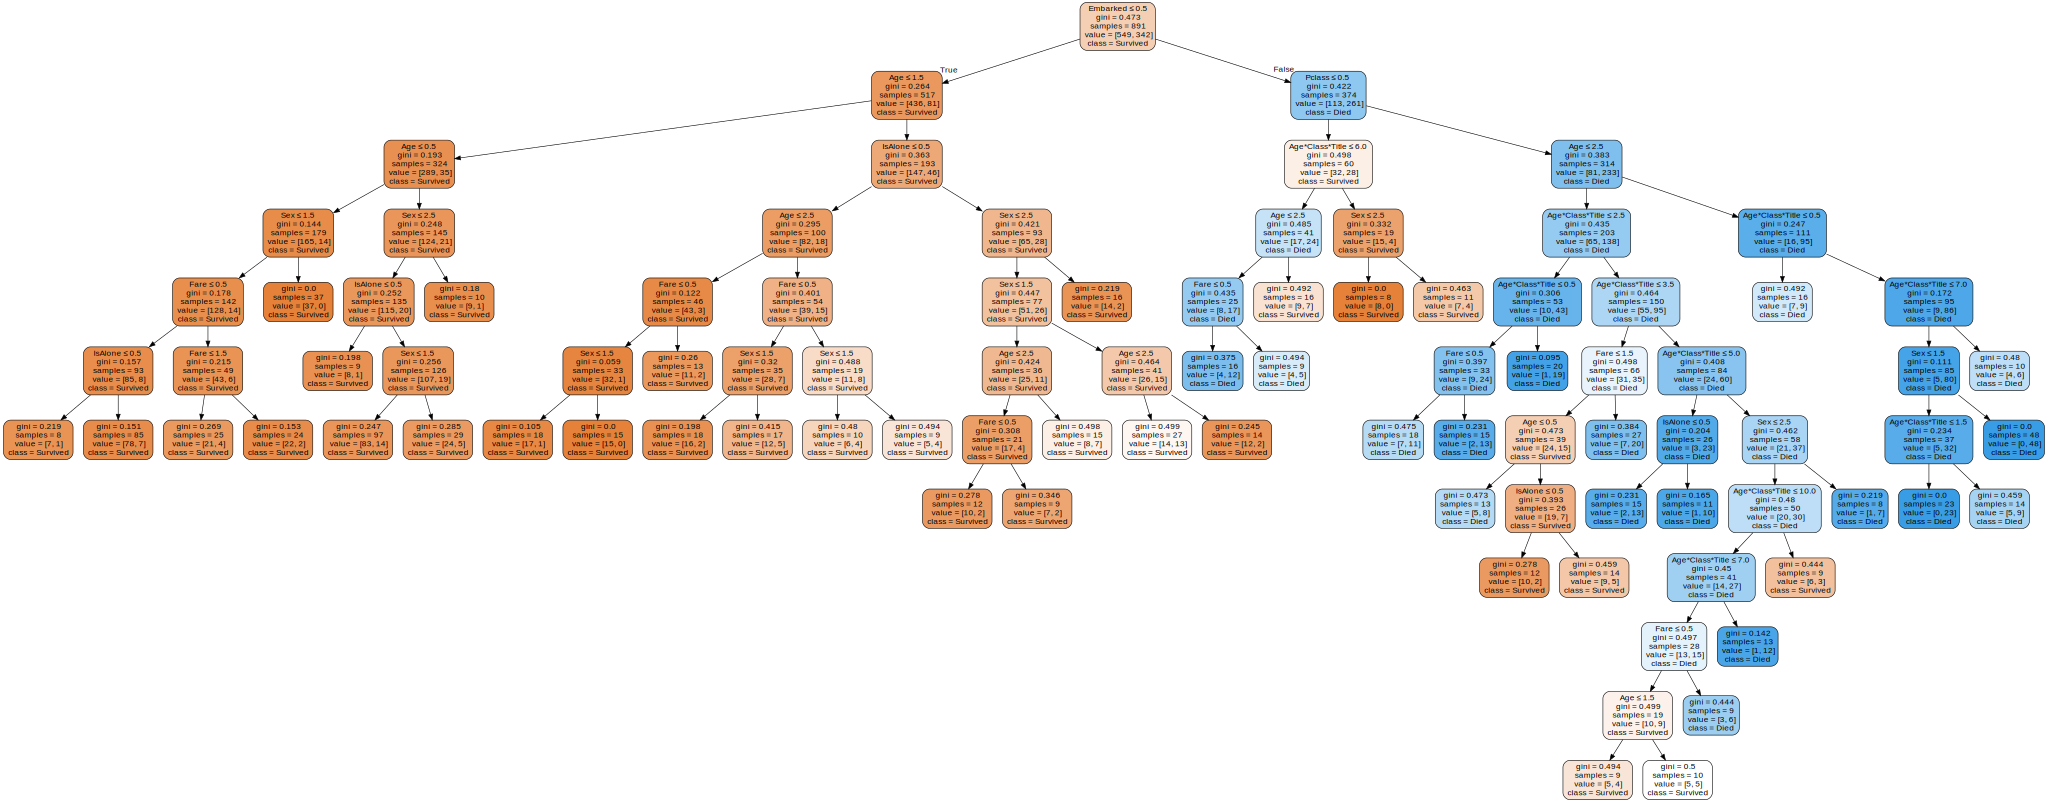

In [601]:
dot_data = export_graphviz(decision_tree, out_file=None, 
                         feature_names=['Pclass','Sex','Age','Fare','Embarked','Age*Class*Title','IsAlone'],  
                         class_names=['Survived','Died'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [801]:

des_regrs = DecisionTreeRegressor(min_samples_leaf = 8,max_depth=12)
des_regrs.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
#print(Y_pred)
print(des_regrs.score(X_train, Y_train))

submission = pd.DataFrame({
        "PassengerId": ids,
        "Survived": Y_pred
    })
submission.to_csv('Fully_processed_des_reg.csv', encoding='utf-8', index=False)

0.45386287247


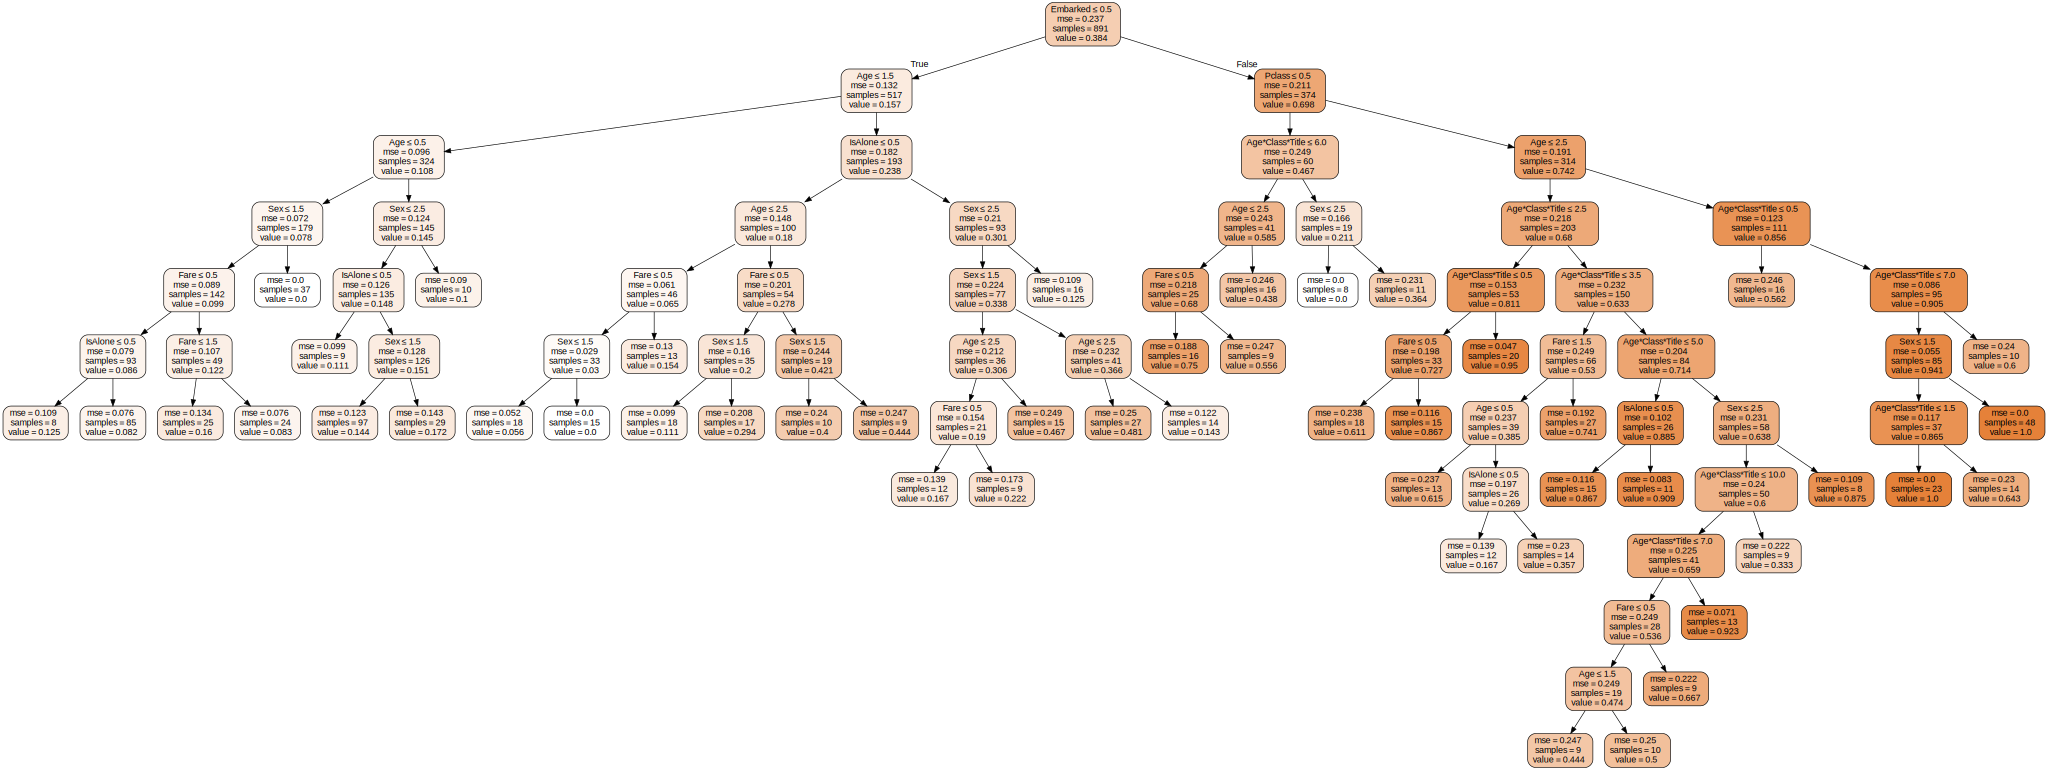

In [603]:
dot_data = export_graphviz(des_regrs, out_file=None, 
                         feature_names=['Pclass','Sex','Age','Fare','Embarked','Age*Class*Title','IsAlone'],  
                         class_names=['Survived','Died'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 